In [ ]:
# !pip install import-ipynb

In [1]:
import pandas as pd
import import_ipynb
import preprocessamentofuncoes as pp

import matplotlib.pyplot as plt
import seaborn as sns

importing Jupyter notebook from preprocessamentofuncoes.ipynb


In [ ]:
def realizarPreProcessamento(uf, lote):
    # Carregando a base
    urlBase = "/media/wallece/HD EXTRA/bases/sus-" + uf + "-" + lote + ".csv"
    covidAllData = pd.read_csv(urlBase, on_bad_lines='skip', sep=';')
    covidAllData.shape
    
    # Definição dos Atributos Utilizados
    colunasImportantes = ['source_id', 'dataInicioSintomas', 'dataNotificacao', 'sexo', 'racaCor', 
    'idade', 'sintomas', 'outrosSintomas', 'condicoes', 'outrasCondicoes', 'dataPrimeiraDose', 
    'dataSegundaDose', 'classificacaoFinal', 'evolucaoCaso']
    covidData = covidAllData[colunasImportantes]
    
    # Limpeza - Classificação Final
    covidData = pp.classFinPreprocessamento(covidData, 'classificacaoFinal')
    
    # Limpeza - Evolução
    covidData = pp.evolucaoPreprocessamento(covidData, 'evolucaoCaso')
    
    # Limpeza - Dias de Sintomas
    covidData = pp.diasSintomasPreprocessamento(covidData, 'dataInicioSintomas', 'dataNotificacao', 'diasSintomas')
    
    # Limpeza - Sintomas
    covidData = pp.sintomasPreprocessamento(covidData, 'sintomas')
    covidData = pp.outrosSintomasPreprocessamento(covidData, 'outrosSintomas')
    
    # Limpeza - Condições
    covidData = pp.condicoesPreprocessamento(covidData, 'condicoes')
    covidData = pp.outrasCondicoesPreprocessamento(covidData, 'outrasCondicoes')
    
    # Limpeza - Vacinas
    covidData = pp.adicionarQntVacinasPreprocessamento(covidData, 'dataPrimeiraDose', 'dataSegundaDose', 'qntVacinas')
    
    # Limpeza - Idade
    covidData = pp.idadePreprocessamento(covidData, 'idade', 'faixaetaria')
    
    # Limpeza - Raça
    covidData = pp.racaPreprocessamento(covidData, 'racaCor')
    
    # Limpeza - Sexo
    covidData = pp.sexoPreprocessamento(covidData, 'sexo')
    
    # Formatando as Condições
    covidData = pp.condicoesFormatarValores(covidData)
    
    # Formatando as Colunas
    covidData = pp.formatarColunas(covidData)
    
    # Formatando os valores da Evolução do Caso
    evolucao = 'evolucaoCaso'
    covidData[evolucao] = covidData[evolucao].replace([0, 1, 'Internado'], [0, 1, 2])
    
    # Salvando a base de dados
    pp.salvarBaseDeDados(covidData, "PreProcessamento/sus-"  + uf + "-pp-" + lote + ".xlsx")

## Descrição do Pré-Processamento

In [2]:
uf = "sp"
lote = "l1"
urlBase = "/media/wallece/HD EXTRA/bases/sus-" + uf + "-" + lote + ".csv"

print(urlBase)

covidAllData = pd.read_csv(urlBase, on_bad_lines='skip', sep=';')
covidAllData.shape

/media/wallece/HD EXTRA/bases/sus-sp-l1.csv


/home/wallece/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (15,20,21,22,30,33,45,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(999998, 64)

In [ ]:
# Visualizando Dados
# covidAllData.head()

In [3]:
# Definição dos Atributos Utilizados
colunasImportantes = ['source_id', 'dataInicioSintomas', 'dataNotificacao', 'sexo', 'racaCor', 'idade', 
                      'sintomas', 'outrosSintomas', 'condicoes', 'outrasCondicoes', 'dataPrimeiraDose', 
                      'dataSegundaDose', 'classificacaoFinal', 'evolucaoCaso']
covidData = covidAllData[colunasImportantes]

### Limpeza de Dados - Classificação Final


In [ ]:
# Visualizando o formato das condições
#covidData['classificacaoFinal'].value_counts()

In [4]:
covidData = pp.classFinPreprocessamento(covidData, 'classificacaoFinal')
covidData['classificacaoFinal'].value_counts()

Confirmado    184026
Name: classificacaoFinal, dtype: int64

In [ ]:
# pp.visualizarQntFaltosos(covidData)

### Limpeza de Dados - Atibuto Evolução

In [5]:
# covidData[alvo].unique()
evolucao = 'evolucaoCaso'
covidData[evolucao].value_counts()

Cura                        154263
Em tratamento domiciliar     14007
Ignorado                     10828
Cancelado                     1224
Óbito                          319
Internado                      121
Internado em UTI                15
Name: evolucaoCaso, dtype: int64

In [6]:
covidData = pp.evolucaoPreprocessamento(covidData, evolucao)
covidData[evolucao].value_counts()

Cura         168270
Óbito           319
Internado       136
Name: evolucaoCaso, dtype: int64

In [ ]:
# dados_faltosos = pp.visualizarQntFaltosos(covidData)
# dados_faltosos

In [ ]:
# covidData[evolucao].value_counts()
# covidData.shape

### Plotando a Nuvem de Palavras

In [ ]:
# Nuvem de Palavras por Termos
#pp.plotarNuvemDePalavras(covidData, 'outrasCondicoes', 30)

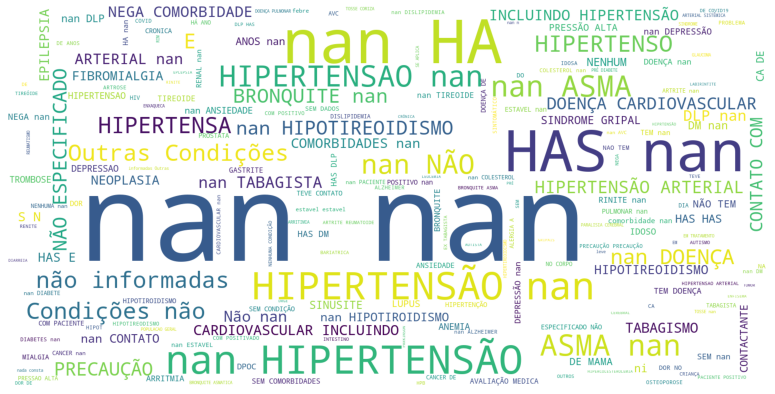

In [7]:
# Nuvem de Palavras por Palavra Individual
#pp.plotarNuvemDePalavrasIndividual(covidData, 'outrasCondicoes')

### Limpeza de Dados - Dias de Sintomas

In [ ]:
covidData = pp.diasSintomasPreprocessamento(covidData, 'dataInicioSintomas', 'dataNotificacao', 'diasSintomas')
# covidData[['dataInicioSintomas', 'dataNotificacao', 'diasSintomas']].head(30)

In [ ]:
#covidData['diasSintomas'].value_counts()
#pp.visualizarQntFaltosos(covidData)

### Limpeza de Dados - Sintomas

In [ ]:
sintomas = 'sintomas'
covidData = pp.sintomasPreprocessamento(covidData, sintomas)
covidData.shape

In [ ]:
#covidData.head()

### Limpeza de Dados - Outros Sintomas

In [ ]:
outrosSintomas = 'outrosSintomas'
covidData = pp.outrosSintomasPreprocessamento(covidData, outrosSintomas)
covidData.shape

In [ ]:
#covidData[['outrosSintomas', 'mialgia', 'dorNoCorpo', 'diarreia', 'cansaco']].head(50)

In [ ]:
covidData['mialgia'].value_counts()

### Limpeza de Dados - Condições

In [ ]:
# covidData.shape

In [ ]:
condicoes = 'condicoes'
covidData = pp.condicoesPreprocessamento(covidData, condicoes)
covidData.shape

In [ ]:
#covidData.head()

### Limpeza de Dados - Outras Condições

In [ ]:
outrasCondicoes = 'outrasCondicoes'
covidData = pp.outrasCondicoesPreprocessamento(covidData, outrasCondicoes)
covidData.shape

In [ ]:
#covidData[['outrasCondicoes', 'hipertensao', 'asma', 'bronquite', 'hipotireoidismo']].head(60)

### Limpeza de Dados - Quantidade de Vacinas

In [ ]:
covidData = pp.adicionarQntVacinasPreprocessamento(covidData, 'dataPrimeiraDose', 'dataSegundaDose', 'qntVacinas')

In [ ]:
#covidData[['dataPrimeiraDose', 'dataSegundaDose', 'qntVacinas']]

### Limpeza de Dados - Idade

In [ ]:
covidData.shape

In [ ]:
idade = 'idade'
covidData = pp.idadePreprocessamento(covidData, idade, 'faixaetaria')

In [ ]:
covidData['faixaetaria'].value_counts()

### Limpeza de Dados - Raça

In [ ]:
raca = 'racaCor'
covidData[raca].value_counts()

In [ ]:
covidData = pp.racaPreprocessamento(covidData, raca)
covidData[raca].value_counts()

### Limpeza de Dados - Sexo

In [ ]:
sexo = 'sexo'
covidData[sexo].value_counts()

In [ ]:
covidData = pp.sexoPreprocessamento(covidData, sexo)

In [ ]:
covidData[sexo].value_counts()

### Formatando Condições

In [ ]:
covidData = pp.condicoesFormatarValores(covidData)

### Limpeza dos Dados - Balanceamento

In [ ]:
#covidDataBalanced = pp.balanceamento(covidData, 'evolucaoCaso', 'Óbito', 40, 'Cura')
# pp.condicoesQntValoresComAusentes(covidDataBalanced)
#covidDataBalanced.shape

In [ ]:
#covidDataBalanced = pp.condicoesFormatarValores(covidDataBalanced)
#pp.condicoesQntValores(covidDataBalanced)

In [ ]:
#pp.sintomasQntValores(covidDataBalanced)

In [ ]:
#covidDataBalanced.shape

### Limpeza dos Dados - Removendo Colunas

In [ ]:
colunasRemovidas = ['source_id', 'idade', 'sintomas', 'condicoes', 'classificacaoFinal', 
                    'outrosSintomas', 'outrasCondicoes', 'dataInicioSintomas', 'dataNotificacao']
# colunasRemovidas = ['source_id', 'idade', 'sintomas', 'condicoes', 'disturbiosOlfativos', 
#                    'disturbiosGustatorios', 'puerpera', 'fragilidadeImuno', 'gestante', 
#                    'obesidade', 'classificacaoFinal']

In [ ]:
# Excluir linha abaixo caso utilize o balanceamento
covidDataBalanced = covidData

covidDataBalanced = pp.removerColunas(covidDataBalanced, colunasRemovidas)
covidDataBalanced.shape

### Limpeza dos Dados - Formatando Colunas

In [ ]:
# Colunas Formatadas: sexo e racaCor
print(covidDataBalanced['sexo'].value_counts(), '\n\n',covidDataBalanced['racaCor'].value_counts())

In [ ]:
covidDataBalanced = pp.formatarColunas(covidDataBalanced)
#print(covidDataBalanced['sexo'].value_counts(), '\n\n', covidDataBalanced['racaCor'].value_counts())

### Salvando a Base Pré-processada

In [ ]:
covidDataBalanced.shape

In [ ]:
evolucao = 'evolucaoCaso'
covidDataBalanced[evolucao]= covidDataBalanced[evolucao].replace([0, 1, 'Internado'], [0, 1, 2])

In [ ]:
# dados_faltosos = pp.visualizarQntFaltosos(covidDataBalanced)
# dados_faltosos
covidDataBalanced['evolucaoCaso'].value_counts()

In [ ]:
pp.salvarBaseDeDados(covidDataBalanced, "PreProcessamento/sus-"  + uf + "-pp-" + lote + ".xlsx")

### Juntando Lotes

In [ ]:
uf = "sp"
dados1 = pd.read_excel("PreProcessamento/sus-" + uf + "-pp-l1.xlsx")

In [ ]:
dados1

In [ ]:
# Juntar Bases
dadosAgrupados = pp.juntarBases([dados1, dados2, dados3, dados4, dados5, dados6, dados7])

# Salvar Base Agrupada
pp.salvarBaseDeDados(dadosAgrupados, urldefault + uf + "-pp.xlsx")


In [ ]:
def realizarPreProcessamento(uf, lote):
    # Carregando a base
    urlBase = "/media/wallece/HD EXTRA/bases/sus-" + uf + "-" + lote + ".csv"
    covidAllData = pd.read_csv(urlBase, on_bad_lines='skip', sep=';')
    covidAllData.shape
    
    # Definição dos Atributos Utilizados
    colunasImportantes = ['source_id', 'dataInicioSintomas', 'dataNotificacao', 'sexo', 'racaCor', 
    'idade', 'sintomas', 'outrosSintomas', 'condicoes', 'outrasCondicoes', 'dataPrimeiraDose', 
    'dataSegundaDose', 'classificacaoFinal', 'evolucaoCaso']
    covidData = covidAllData[colunasImportantes]
    
    # Limpeza - Classificação Final
    covidData = pp.classFinPreprocessamento(covidData, 'classificacaoFinal')
    
    # Limpeza - Evolução
    covidData = pp.evolucaoPreprocessamento(covidData, 'evolucao')
    
    # Limpeza - Dias de Sintomas
    covidData = pp.diasSintomasPreprocessamento(covidData, 'dataInicioSintomas', 'dataNotificacao', 'diasSintomas')
    
    # Limpeza - Sintomas
    covidData = pp.sintomasPreprocessamento(covidData, 'sintomas')
    covidData = pp.outrosSintomasPreprocessamento(covidData, 'outrosSintomas')
    
    # Limpeza - Condições
    covidData = pp.condicoesPreprocessamento(covidData, 'condicoes')
    covidData = pp.outrasCondicoesPreprocessamento(covidData, 'outrasCondicoes')
    
    # Limpeza - Vacinas
    covidData = pp.adicionarQntVacinasPreprocessamento(covidData, 'dataPrimeiraDose', 'dataSegundaDose', 'qntVacinas')
    
    # Limpeza - Idade
    covidData = pp.idadePreprocessamento(covidData, 'idade', 'faixaetaria')
    
    # Limpeza - Raça
    covidData = pp.racaPreprocessamento(covidData, 'racaCor')
    
    # Limpeza - Sexo
    covidData = pp.sexoPreprocessamento(covidData, 'sexo')
    
    # Formatando as Condições
    covidData = pp.condicoesFormatarValores(covidData)
    
    # Formatando as Colunas
    covidData = pp.formatarColunas(covidData)
    
    # Formatando os valores da Evolução do Caso
    evolucao = 'evolucaoCaso'
    covidData[evolucao] = covidData[evolucao].replace([0, 1, 'Internado'], [0, 1, 2])
    
    # Salvando a base de dados
    pp.salvarBaseDeDados(covidData, "PreProcessamento/sus-"  + uf + "-pp-" + lote + ".xlsx")